<img src="https://www.vedantu.com/seo/content-images/12fc5f31-305d-4104-a083-cd21e1f8ff10_Diwali_is_on_Thu%2C_31_Oct%2C_2024.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 1024px; height: 244px; margin: 0px; width: 244px;" alt="Five Magic Days of Diwali: Festival of Lights and Its Traditions" jsname="kn3ccd" aria-hidden="false">

**Step 1: Import Necessary Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns  

**Step 2: Load the Dataset**

In [3]:
diwali = pd.read_csv(r"D:\FSDS Material\Data Files\Diwali Sales Data.csv", encoding='unicode_escape')

**Display basic information about the dataset**

In [7]:
print(diwali.shape)  # Checking the number of rows and columns

(11251, 15)


In [9]:
diwali.head()  # Displaying the first 5 rows

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
diwali.info()  # Checking data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


**Step 3: Data Cleaning and Preprocessing**

In [14]:
# Dropping unrelated or empty columns
diwali.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [16]:
# Checking for missing values
print(pd.isnull(diwali).sum())

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [18]:
# Dropping null values
diwali.dropna(inplace=True)

In [20]:
# Changing the data type of the 'Amount' column from object to integer
diwali['Amount'] = diwali['Amount'].astype('int')

In [22]:
# Confirming data type change
print(diwali['Amount'].dtypes)

int32


In [24]:
# Displaying column names
print(diwali.columns)

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


In [26]:
# Renaming columns for better readability
diwali.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)

**Step 4: Exploratory Data Analysis (EDA)**

In [29]:
# Checking statistical summary of numerical columns
print(diwali.describe())

            User_ID           Age        Shaadi        Orders        Amount
count  1.123900e+04  11239.000000  11239.000000  11239.000000  11239.000000
mean   1.003004e+06     35.410357      0.420055      2.489634   9453.610553
std    1.716039e+03     12.753866      0.493589      1.114967   5222.355168
min    1.000001e+06     12.000000      0.000000      1.000000    188.000000
25%    1.001492e+06     27.000000      0.000000      2.000000   5443.000000
50%    1.003064e+06     33.000000      0.000000      2.000000   8109.000000
75%    1.004426e+06     43.000000      1.000000      3.000000  12675.000000
max    1.006040e+06     92.000000      1.000000      4.000000  23952.000000


In [31]:
# Display summary for specific columns
print(diwali[['Age', 'Orders', 'Amount']].describe())

                Age        Orders        Amount
count  11239.000000  11239.000000  11239.000000
mean      35.410357      2.489634   9453.610553
std       12.753866      1.114967   5222.355168
min       12.000000      1.000000    188.000000
25%       27.000000      2.000000   5443.000000
50%       33.000000      2.000000   8109.000000
75%       43.000000      3.000000  12675.000000
max       92.000000      4.000000  23952.000000


**Step 5: Data Visualization**

**1️⃣ Gender Analysis**

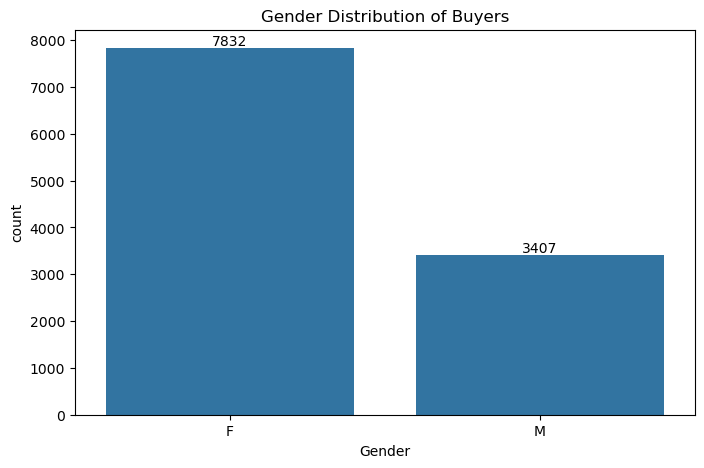

In [35]:
# Countplot for Gender distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Gender', data=diwali)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender Distribution of Buyers")
plt.show()

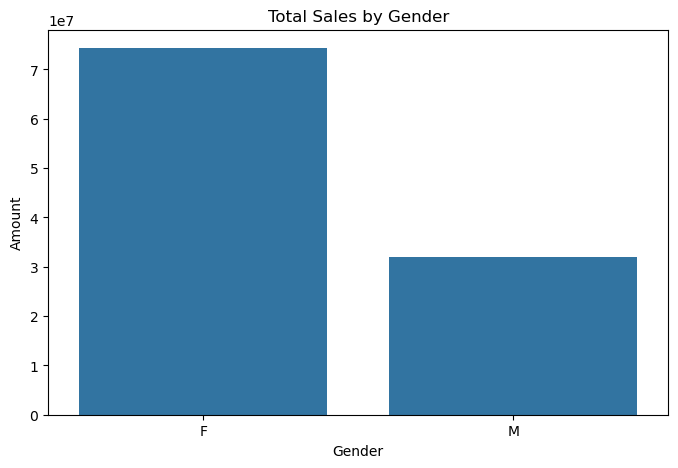

In [37]:
# Sales analysis based on Gender
sales_gen = diwali.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Amount', data=sales_gen)
plt.title("Total Sales by Gender")
plt.show()
# 🔹 Observation: Most buyers are **females**, and their purchasing power is higher than men.

**2️⃣ Age Group Analysis**

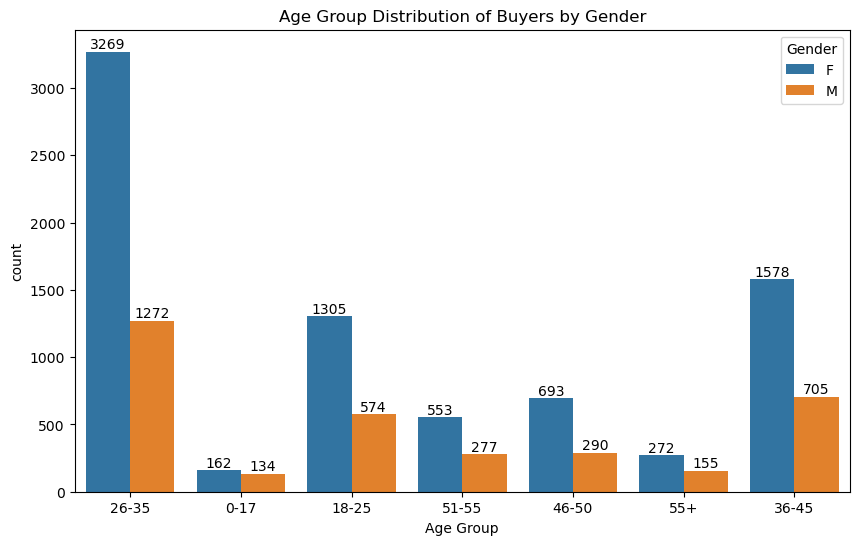

In [40]:
# Countplot for Age Group distribution with Gender
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diwali, x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Age Group Distribution of Buyers by Gender")
plt.show()

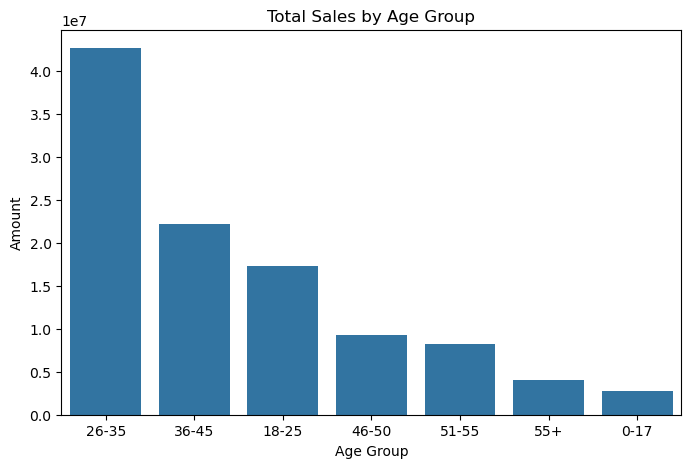

In [42]:
# Total Sales vs. Age Group
sales_age = diwali.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Age Group', y='Amount', data=sales_age)
plt.title("Total Sales by Age Group")
plt.show()
# 🔹 Observation: Most buyers belong to the **26-35 years** age group.

**3️⃣ State-wise Analysis**

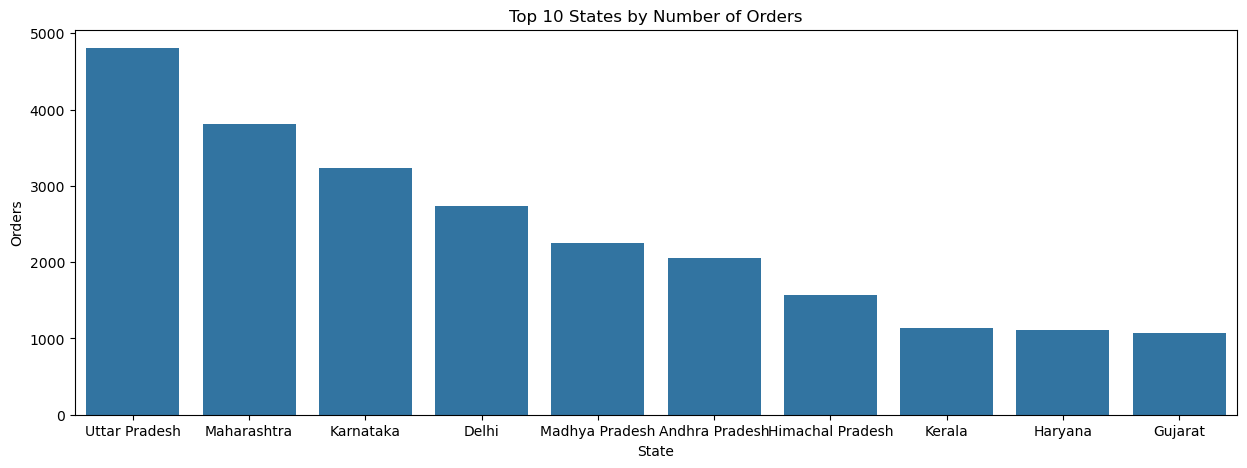

In [45]:
# Top 10 states by number of orders
sales_state = diwali.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_state, x='State', y='Orders')
plt.title("Top 10 States by Number of Orders")
plt.show()

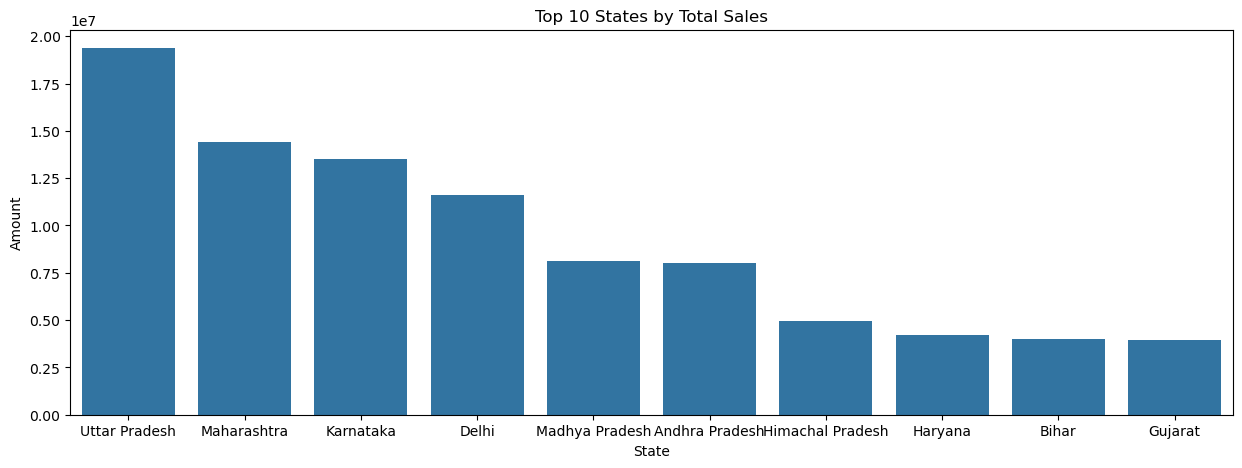

In [47]:
# Top 10 states by total sales
sales_state = diwali.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_state, x='State', y='Amount')
plt.title("Top 10 States by Total Sales")
plt.show()
# 🔹 Observation: Most orders & total sales come from **Uttar Pradesh, Maharashtra, and Karnataka**.

**4️⃣ Marital Status Analysis**

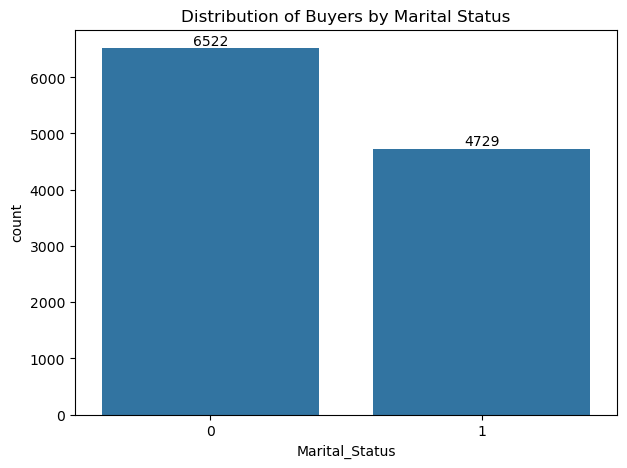

In [55]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=diwali, x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Distribution of Buyers by Marital Status")
plt.show()

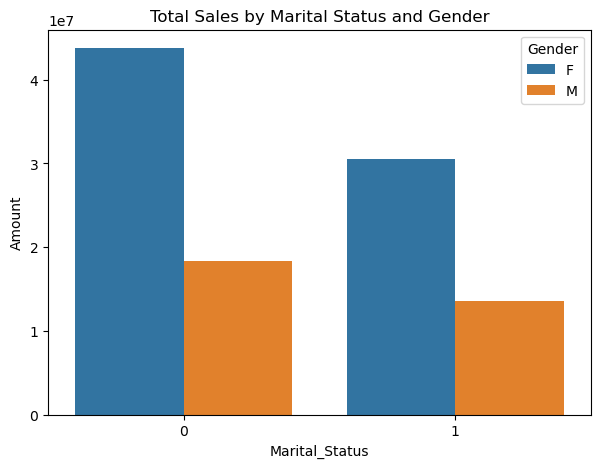

In [57]:
# Marital status vs. Total Sales (categorized by Gender)
sales_marital = diwali.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(data=sales_marital, x='Marital_Status', y='Amount', hue='Gender')
plt.title("Total Sales by Marital Status and Gender")
plt.show()
# 🔹 Observation: Married women have the highest purchasing power.

**5️⃣ Occupation Analysis**

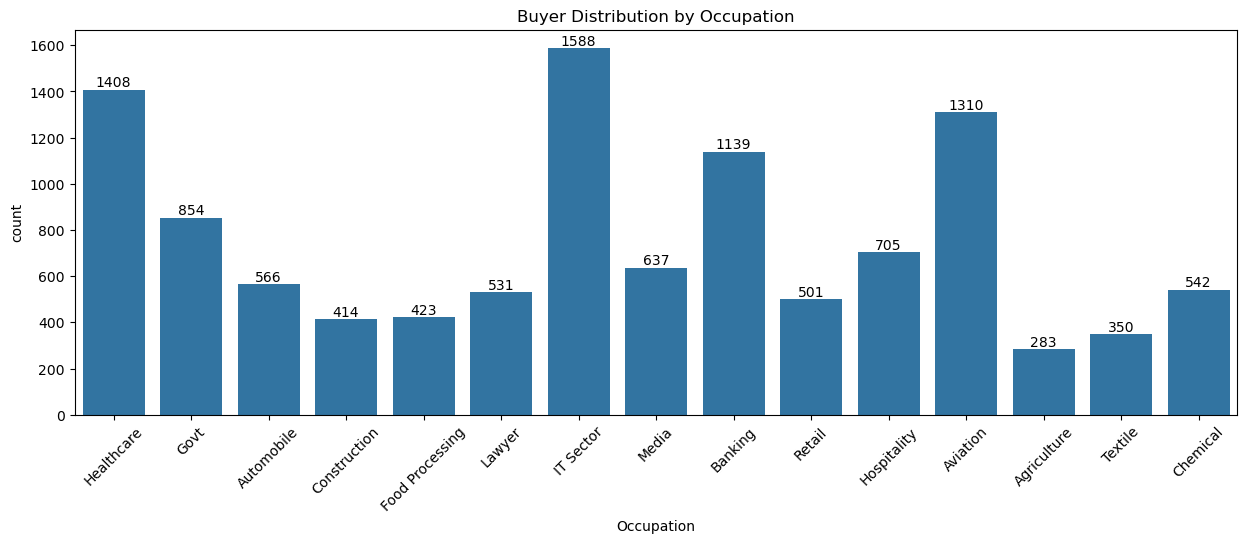

In [60]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=diwali, x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Buyer Distribution by Occupation")
plt.xticks(rotation=45)
plt.show()

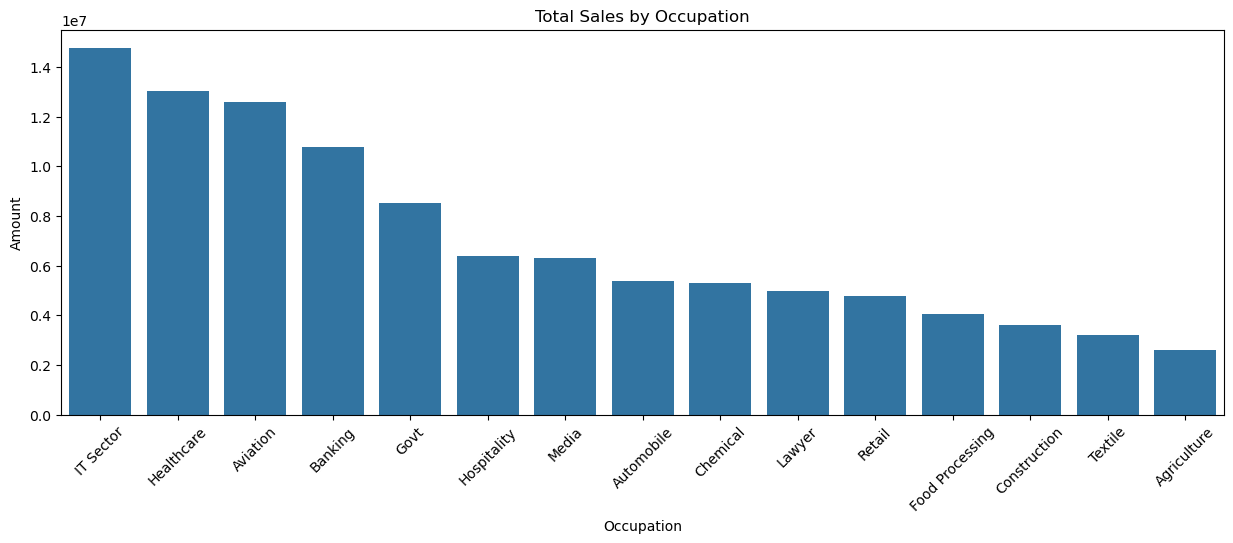

In [62]:
# Total Sales by Occupation
sales_occ = diwali.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_occ, x='Occupation', y='Amount')
plt.title("Total Sales by Occupation")
plt.xticks(rotation=45)
plt.show()
# 🔹 Observation: Buyers from **IT, Healthcare, and Aviation sectors** spend the most.

**6️⃣ Product Category Analysis**

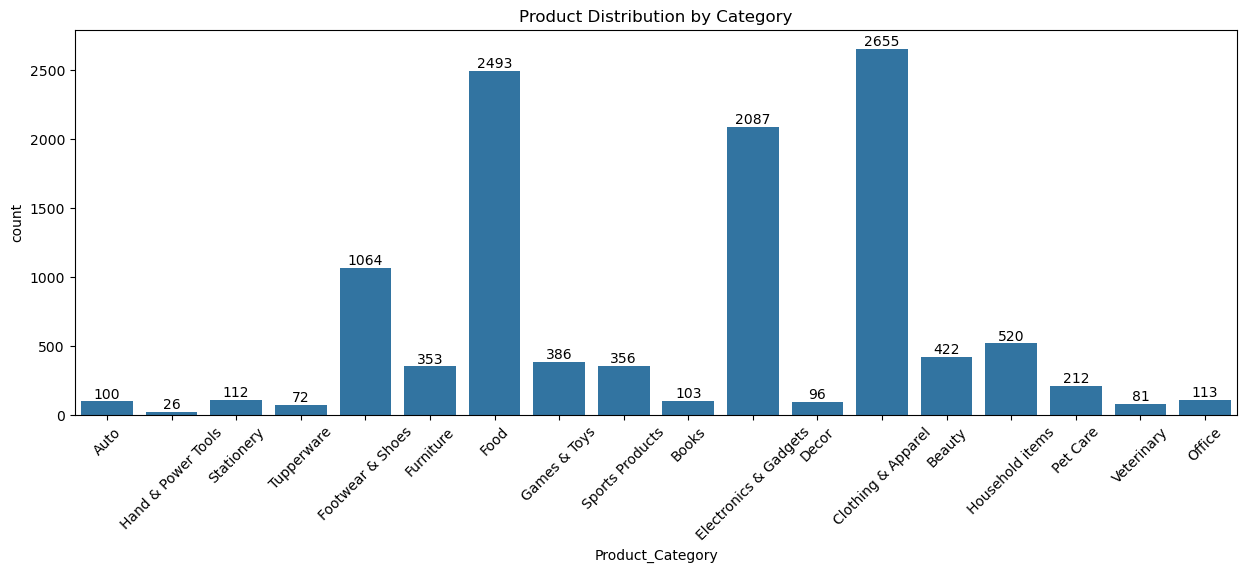

In [65]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=diwali, x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Product Distribution by Category")
plt.xticks(rotation=45)
plt.show()

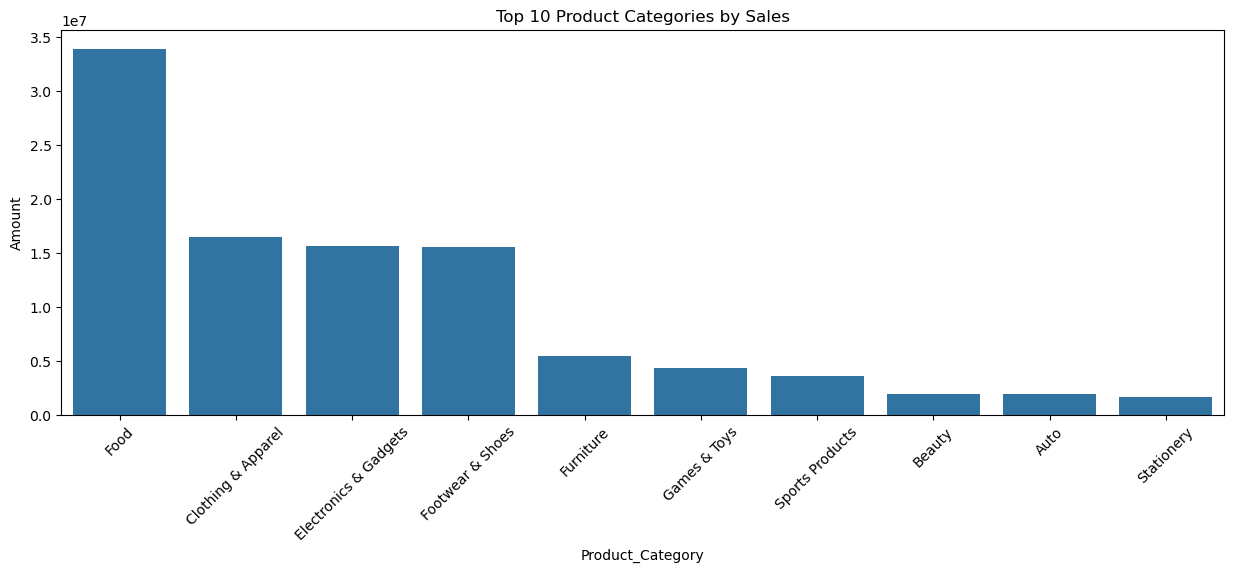

In [67]:
# Top 10 Product Categories by Sales
sales_prod_cat = diwali.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_prod_cat, x='Product_Category', y='Amount')
plt.title("Top 10 Product Categories by Sales")
plt.xticks(rotation=45)
plt.show()
# 🔹 Observation: **Food, Clothing, and Electronics** are the top-selling product categories.

**7️⃣ Top-Selling Products**

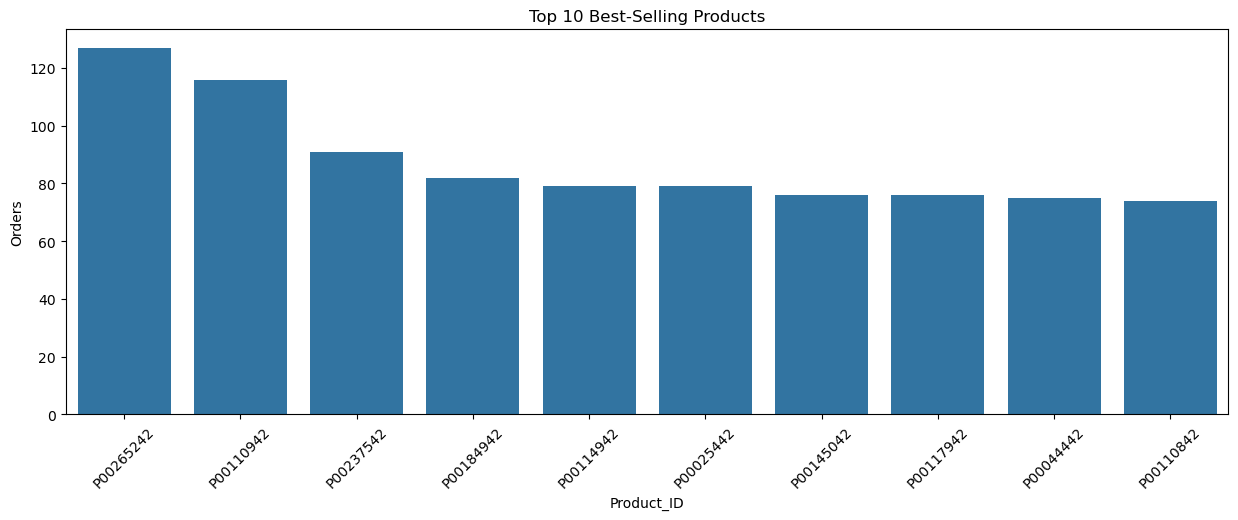

In [70]:
sales_prod_id = diwali.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
plt.figure(figsize=(15, 5))
sns.barplot(data=sales_prod_id, x='Product_ID', y='Orders')
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45)
plt.show()

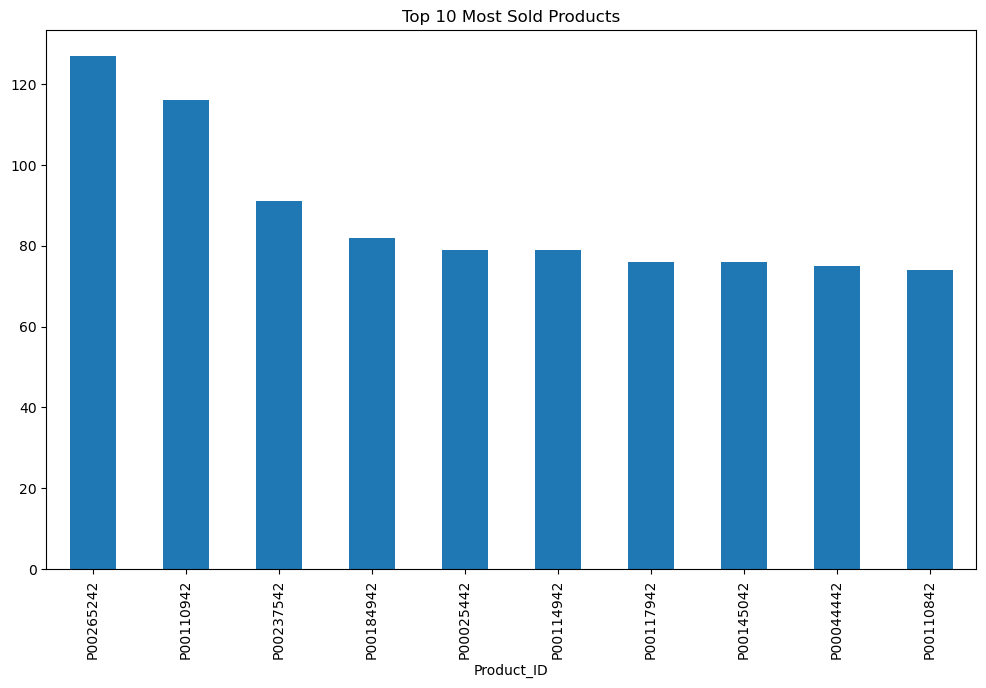

In [72]:
# Alternate way to visualize top 10 products
plt.figure(figsize=(12, 7))
diwali.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')
plt.title("Top 10 Most Sold Products")
plt.show()